# Twitter Sentiment Analysis

A Twitter (now X) sentiment analysis determines negative, positive, or neutral emotions within the text of a tweet using NLP and ML models. Sentiment analysis or opinion mining refers to identifying as well as classifying the sentiments that are expressed in the text source. Tweets are often useful in generating a vast amount of sentiment data upon analysis. These data are useful in understanding the opinion of people on social media for a variety of topics.

We're going to take the following approach:

1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
In a statement, 
> Develop a sentiment analysis system for X (formerly Twitter) to categorize tweets as negative, positive, or neutral emotions, enabling insights into public opinion on various topics using NLP and ML models.

## 2. Data
We will be using **Sentiment140 dataset** from Kaggle, which consists of 16,00,000 tweets that have been extracted using the Twitter API. 

Link to the dataset: https://www.kaggle.com/datasets/kazanova/sentiment140

## 3. Evaluation
The effectiveness of the sentiment analysis system will be assessed based on its accuracy in classifying tweets into negative, positive, or neutral categories, its ability to handle large volumes of real-time data from X (formerly Twitter), and its capacity to provide actionable insights into public opinion on diverse topics.

## 4. Features
This is where you will get information about each feature in the data.

* **target:** the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)<br>
* **ids:** Unique id of the tweet (2087)<br>
* **date:** the date of the tweet (Sat May 16 23:58:44 UTC 2009)<br>
* **flag:** It refers to the query. If no such query exists, then it is NO QUERY.<br>
* **user:** It refers to the name of the user that tweeted (robotickilldozr)<br>
* **text:** It refers to the text of the tweet (Lyx is cool)

#### Preparing the tools

In [2]:
# utilities
import re #regex
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
from nltk.stem import WordNetLemmatizer #Lemmatization is the process of reducing the word (running -> run, cats-> cat)

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

#### Reading and Loading the dataset

In [3]:
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"

df = pd.read_csv("data/twitter-dataset.csv", encoding=DATASET_ENCODING, names=DATASET_COLUMNS)

#### Exploratory Data Analysis (EDA)

In [4]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [6]:
print(f"Length of dataset is {len(df)}")

Length of dataset is 1600000


In [7]:
df.shape

(1600000, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [10]:
df.isna().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [11]:
df['target'].unique()

array([0, 4], dtype=int64)

[Text(0, 0, 'Negative'), Text(1, 0, 'Positive')]

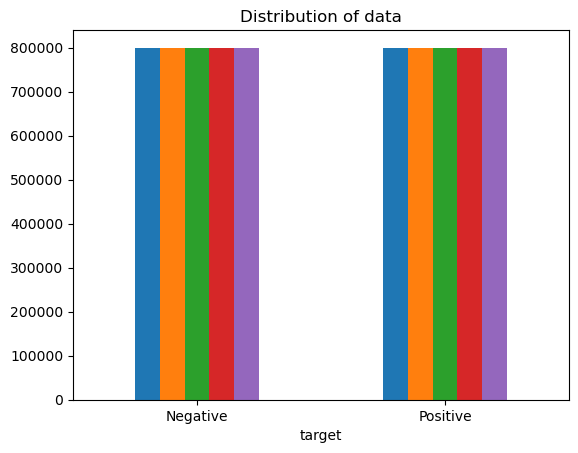

In [19]:
# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

In [16]:
# Storing data in lists.
text = list(df['text'])
sentiment = list(df['target'])

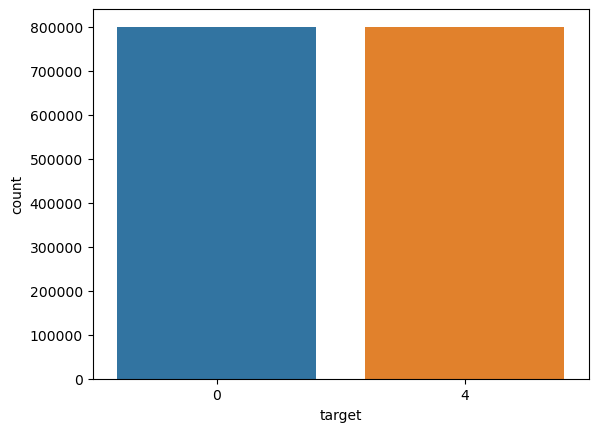

In [21]:
sns.countplot(x='target', data=df);

#### Data preprocessing